<a href="https://colab.research.google.com/github/mohitsingh07/Playstore-App-Review-dataset/blob/main/edaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
inp0 = pd.read_csv("/content/drive/MyDrive/eda /googleplaystore.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [164]:
inp0.shape


(10841, 13)

In [165]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [166]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Handling missing values of rating

In [167]:
inp1 = inp0[~inp0.Rating.isnull()]
inp1.shape

(9367, 13)

In [168]:
inp1.Rating.isnull().sum()


0

### Handling Null values of Android version

In [169]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [170]:
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == '1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [171]:
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == '1.9'))]

In [172]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### THE most common values in android version

In [173]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [174]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

### Filling the nan values with this values

In [175]:
inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
inp1['Android Ver'].isnull().sum()

0

### MISSING VALUES IN CURRENT VER

In [177]:
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

### replace the missing words with varies with device 

In [178]:
inp1['Current Ver'] =inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
inp1['Current Ver'].isnull().sum()

0

In [180]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### change the values to the correct types

In [181]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [182]:
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [183]:
inp1.Price = inp1.Price.apply(lambda x : 0 if x == "0" else float(x[1:]))

In [184]:
inp1.Price.dtype

dtype('float64')

In [185]:
inp1.Price.value_counts()


0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

### handle the reviews coloumn

In [186]:
inp1.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [187]:
inp1.Reviews = inp1.Reviews.astype("int32")

In [188]:
inp1.Reviews.dtypes

dtype('int32')

In [189]:
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### handle the installs colomn 

In [190]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [191]:
def clean(val):
   return int(val.replace("," , "").replace("+", ""))

In [192]:
inp1.Installs= inp1.Installs.apply(clean)

In [193]:
inp1.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [194]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [195]:
inp1.Size.value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [196]:
def fix(val):
   return int(val.replace("M" , "").replace("k", "").replace("Varies with device" , "4").replace("." , ""))

In [197]:
inp1.Size= inp1.Size.apply(fix)

In [198]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [199]:
# IDENTIFY AND HANDLING OUTLIERS/EXTREME VALUES

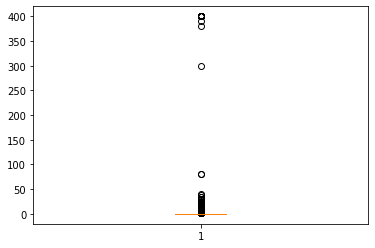

In [200]:
plt.boxplot(inp1.Price)
plt.show()

In [201]:
inp1 = inp1[inp1.Price<200]

In [202]:
inp1.Price.describe()


count    9351.000000
mean        0.334744
std         2.169282
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

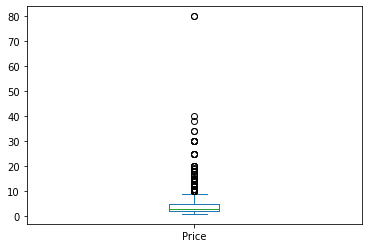

In [203]:
inp1[inp1.Price>0].Price.plot.box()

In [204]:
inp1 =inp1[inp1.Price<=30]

In [205]:
inp1.shape

(9345, 13)

### UNIVARIATE ANALYSIS Categorical features
 ### TYPE

In [206]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9345 non-null   object 
 1   Category        9345 non-null   object 
 2   Rating          9345 non-null   float64
 3   Reviews         9345 non-null   int32  
 4   Size            9345 non-null   int64  
 5   Installs        9345 non-null   int64  
 6   Type            9345 non-null   object 
 7   Price           9345 non-null   float64
 8   Content Rating  9345 non-null   object 
 9   Genres          9345 non-null   object 
 10  Last Updated    9345 non-null   object 
 11  Current Ver     9345 non-null   object 
 12  Android Ver     9345 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 985.6+ KB


In [207]:
inp1.Type.value_counts()

Free    8719
Paid     626
Name: Type, dtype: int64

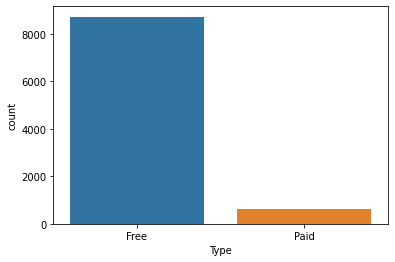

In [208]:
sns.countplot(data = inp1 , x='Type')
plt.show()

### Catergory


In [209]:
inp1.Category.value_counts()

FAMILY                 1743
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 345
COMMUNICATION           328
SPORTS                  319
FINANCE                 317
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               308
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

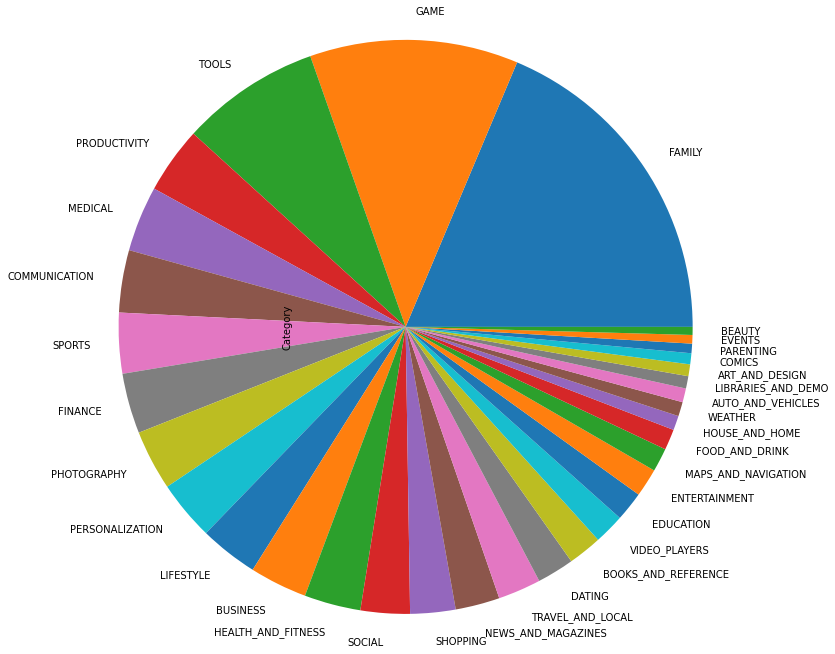

In [210]:
inp1.Category.value_counts(normalize = True).plot.pie(radius = 3.3)
plt.show()

### Content Rating

In [211]:
inp1['Content Rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10834      Everyone
10836      Everyone
10837      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 9345, dtype: object>

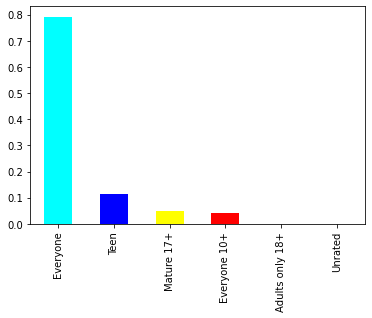

In [212]:
inp1['Content Rating'].value_counts(normalize = True).plot.bar( color = ['cyan' , 'blue' , 'yellow' , 'red' , 'pink'])
plt.show()

### Android Ver

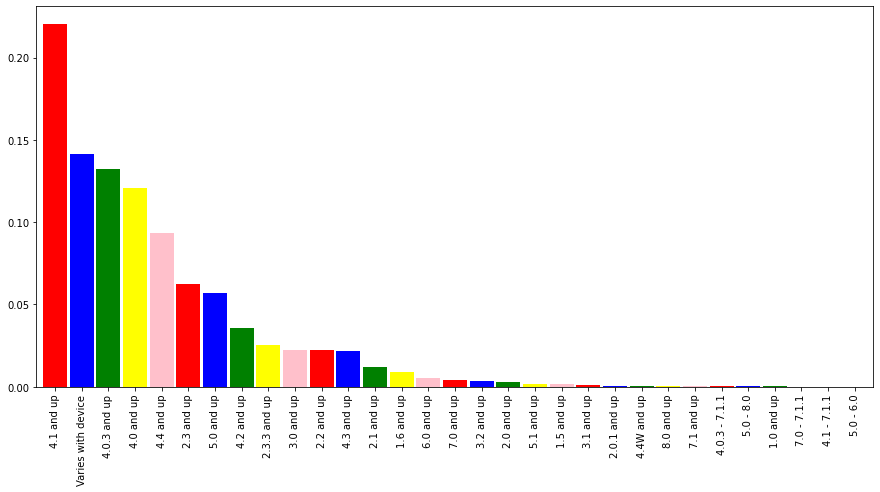

In [213]:
plt.figure(figsize = (15 , 7) )
inp1['Android Ver'].value_counts(normalize = True).plot.bar(width = 0.9 , color = ['red' , 'blue' , 'green' , 'yellow' , 'pink'])

### Bivariate analysis

#### Numerical - Numerical

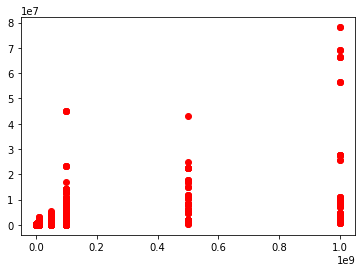

In [214]:
plt.scatter(inp1.Installs , inp1.Reviews , color = 'Red' )
plt.show()

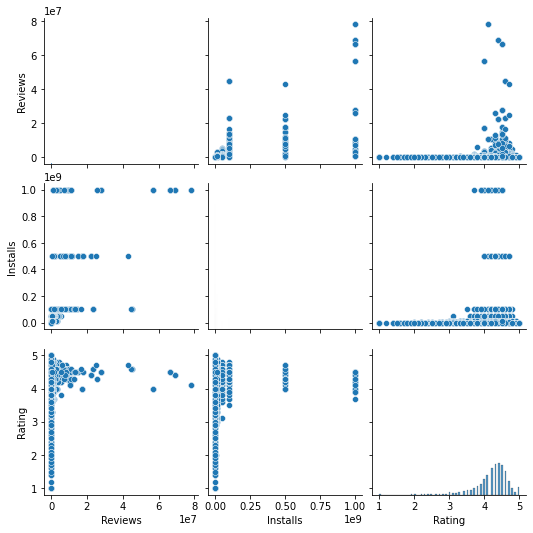

In [215]:
sns.pairplot(data = inp1 , vars = ['Reviews' , 'Installs' , 'Rating']    )
plt.show()

##### QUANTITY ANALYSIS USING CORRELATION VALUES

In [216]:
inp1[['Reviews', 'Installs']].corr()

,Reviews,Installs
Reviews,1.000000,0.641587
Installs,0.641587,1.000000


#### corelation heatmaps

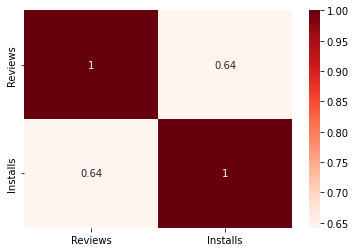

In [217]:
sns.heatmap(inp1[['Reviews'  , 'Installs']].corr() , annot = True , cmap = 'Reds')
plt.show()

#### CATERGORICAL - NUMERICAL

In [218]:
inp1.groupby('Content Rating')['Size'].mean()

Content Rating
Adults only 18+    31.333333
Everyone           47.125541
Everyone 10+       38.690176
Mature 17+         35.236443
Teen               39.279778
Unrated            64.000000
Name: Size, dtype: float64

In [219]:
inp1.groupby('Category')['Size'].median()

Category
ART_AND_DESIGN         29.0
AUTO_AND_VEHICLES      33.0
BEAUTY                 29.0
BOOKS_AND_REFERENCE    29.0
BUSINESS               25.0
COMICS                 28.5
COMMUNICATION          19.5
DATING                 28.0
EDUCATION              18.0
ENTERTAINMENT          15.0
EVENTS                 28.0
FAMILY                 37.0
FINANCE                25.0
FOOD_AND_DRINK         22.0
GAME                   43.0
HEALTH_AND_FITNESS     28.0
HOUSE_AND_HOME         19.0
LIBRARIES_AND_DEMO     70.0
LIFESTYLE              29.5
MAPS_AND_NAVIGATION    26.0
MEDICAL                27.0
NEWS_AND_MAGAZINES     22.0
PARENTING              28.0
PERSONALIZATION        34.0
PHOTOGRAPHY            23.0
PRODUCTIVITY           19.0
SHOPPING               18.0
SOCIAL                 21.0
SPORTS                 25.0
TOOLS                  28.0
TRAVEL_AND_LOCAL       20.5
VIDEO_PLAYERS          24.5
WEATHER                19.0
Name: Size, dtype: float64

In [220]:
inp1.groupby('Category')['Size'].aggregate(['mean' , 'median'])

,mean,median
Category,,
ART_AND_DESIGN,36.467742,29.0
AUTO_AND_VEHICLES,37.534247,33.0
BEAUTY,33.857143,29.0
BOOKS_AND_REFERENCE,40.101124,29.0
BUSINESS,39.874587,25.0
COMICS,47.982759,28.5
COMMUNICATION,52.521341,19.5
DATING,34.241026,28.0
EDUCATION,32.490323,18.0


<Figure size 720x1080 with 0 Axes>

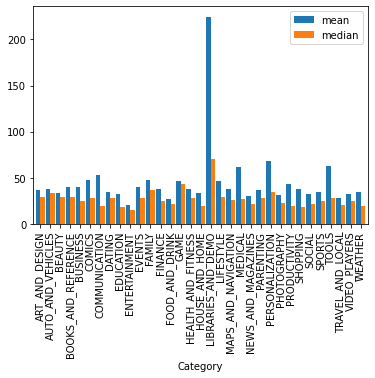

In [221]:
plt.figure(figsize = (10 , 15))
inp1.groupby('Category')['Size'].aggregate(['mean' , 'median']).plot.bar(width = 0.9)
plt.show()

### Categorical - Categorical

In [222]:
inp1['Type_flag'] = np.where(inp1.Type == "Free",1,0)

In [223]:
inp1.Type_flag.value_counts()

1    8719
0     626
Name: Type_flag, dtype: int64

In [224]:
inp1.Type_flag.value_counts(normalize = True)

1    0.933012
0    0.066988
Name: Type_flag, dtype: float64

##### Content rating vs type

In [225]:
inp1.groupby(['Content Rating'])['Type_flag'].mean()

Content Rating
Adults only 18+    1.000000
Everyone           0.928108
Everyone 10+       0.916877
Mature 17+         0.963124
Teen               0.959372
Unrated            1.000000
Name: Type_flag, dtype: float64

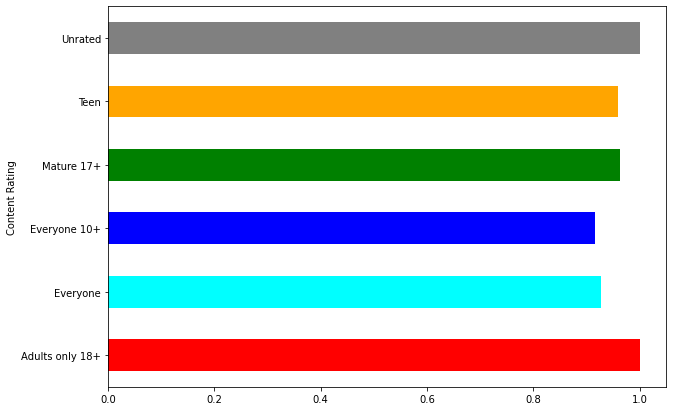

In [226]:
plt.figure(figsize = (10,7))
inp1.groupby(['Content Rating'])['Type_flag'].mean().plot.barh(color = ['Red' , 'Cyan' , 'Blue' , 'Green' , 'Orange' , 'Grey'])
plt.show()

### STATISTICAL  ANALYSIS

### For category coloumn

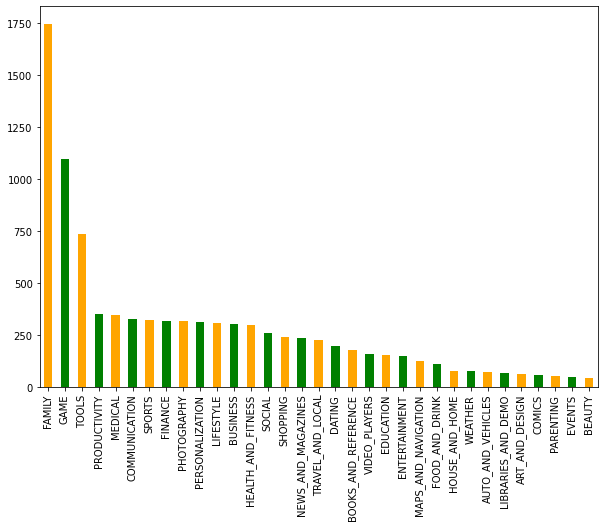

In [227]:
plt.figure(figsize=(10,7))
inp1.Category.value_counts().plot.bar(color = ['Orange' , 'Green'])

In [228]:
inp1.Category.value_counts().mean()

283.1818181818182

#### Heighest and lowest Range of Category of apps avialable in play store

In [229]:
print(str(inp1.Category.value_counts().max()) + '-' + str(inp1.Category.value_counts().min()) )

1743-42


### TYPE OF APPS (FREE / PAID)

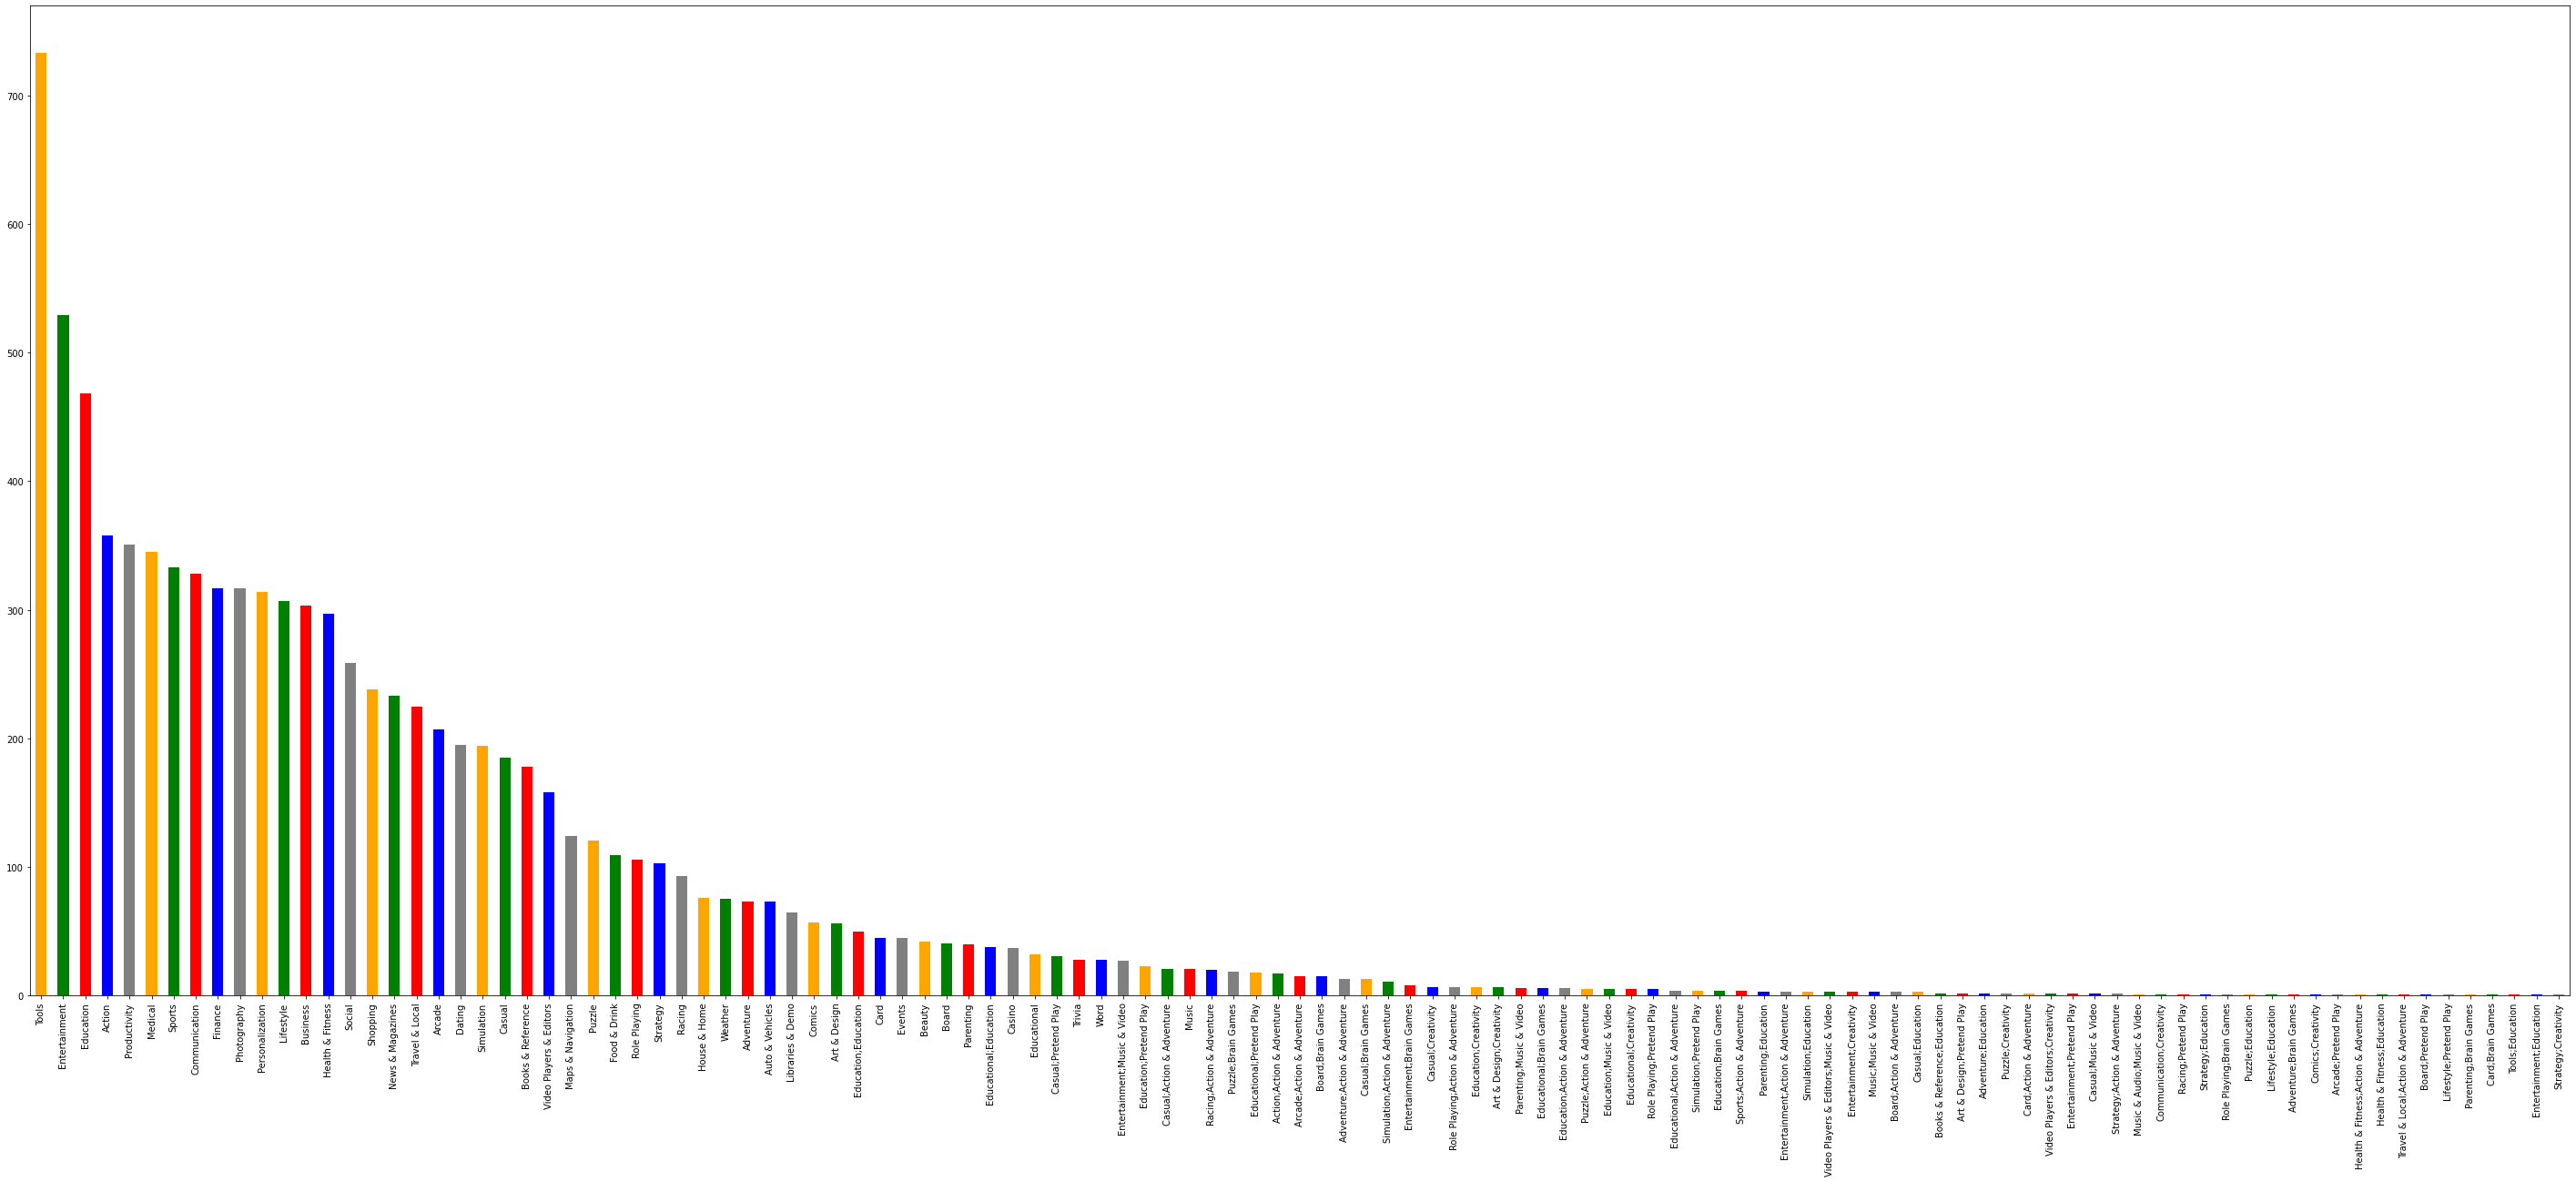

In [230]:
plt.figure(figsize=(50,20))
inp1.Genres.value_counts().plot.bar(color = ['Orange' , 'Green' , 'Red' , 'Blue' ,  'Grey'])

In [231]:
inp1.Genres.value_counts().mean()

81.26086956521739

#### Heighest and lowest Range of Generes of apps avialable in play store

In [232]:
print(str(inp1.Genres.value_counts().max()) + '-' + str(inp1.Genres.value_counts().min()) )

733-1
